# Universidad Politécnica Salesiana



![Universidad Politécnica Salesiana](https://github.com/vlarobbyk/fundamentos-vision-artificial-doctoradoCC/blob/main/images/Logo-UPS-30-Años.png?raw=true)

# $${\color{blue}{\small{ Visión ~por~ Computador \\ Carrera ~de~ Computación}}}$$


# UNIDAD 4.  <font color='darkred'>Fundamentos de descriptores avanzados y reconocimiento de patrones</font>

En este cuaderno se aborda el tema de la Aplicación de visión por computador con aprendizaje profundo, específicamente el uso de redes convolucionales para la detección de objetos. Con esta base, es factible que los estudiantes puedan a *posteriori* desarrollar temas como la segmentación de objetos y la generación de imágenes usando redes convolucionales y redes adversariales.

En esta línea, en este cuaderno se presentará una introducción de uno de los modelos más populares para realizar diversas tareas como segmentación y detección de objetos: [YOLOv11](https://docs.ultralytics.com/ru/models/yolo11/) (*You Only Look Once*).

[![Ejemplo de detección de objetos + segmentación usando YOLOv8](http://img.youtube.com/vi/QgF5PHDCwHw/0.jpg)](https://www.youtube.com/watch?v=QgF5PHDCwHw)



## <font color='green'>Aplicación de visión por computador con aprendizaje profundo</font>

En el área económica, es importante mencionar que de acuerdo a [3], se espera que para el año 2024, el mercado de la visión por computador crezca a 25.80 billones de dólares (billones anglosajones). Asimismo, se proyecta que exista una tasa de crecimiento anual del mercado de 10.50%. Con ello se tendrá 49.96 billones de dólares para el año 2024 (Ver **Fig. 1.**).


![Tamaño del Mercado del área de visión artificial y reonocimiento del habla. Fuente: Statista - Computer Vision - Worldwide.](https://github.com/vlarobbyk/fundamentos-vision-artificial-doctoradoCC/blob/main/images/Figure1.1.png?raw=true)
**Fig. 1.** *Tamaño del Mercado del área de visión artificial y reonocimiento del habla*  [3].

### <font color='orange'> Introducción al modelo YOLO </font>





### <font color='green'>Material Bibliográfico y Web de soporte</font>

El material teórico y práctico de este módulo se sustenta en los siguientes libros:

* Szeliski, R. (2022). *Computer vision: algorithms and applications*. Springer Nature. Se puede obtener una copia gratuita de este libro a través del siguiente enlace (rellenar el formulario): [Computer Vision: Algorithms and Applications, 2nd ed.](https://szeliski.org/Book/)
* Mugesh S.(2023). *Hands-on ML Projects with OpenCV*. Orange Education Pvt Ltd, AVA.
* Kulkarni, A., Shivananda, A., & Nitin Sharma, R. (2022). *Computer Vision Projects with PyTorch*. APRESS.

Las páginas oficiales con documentación que se referenciarán son las que se detallan seguidamente:

* Documentación oficial de la Librería [YOLO](https://docs.ultralytics.com/models/yolov10/)
* Cuaderno de Google Colab sobre entrenamiento de YOLOv11 usando un *dataset* propio de imágenes: [How to Train YOLO11 Object Detection on a Custom Dataset](https://colab.research.google.com/github/roboflow/notebooks/blob/main/notebooks/train-yolo11-object-detection-on-custom-dataset.ipynb?ref=blog.roboflow.com)
* Documentación oficial de la Librería [OpenCV Documentation](https://docs.opencv.org/4.7.0/index.html).
* Documentación oficial de [Pytorch Doc](https://pytorch.org/docs/stable/index.html) para algunos ejemplos detallados en módulo.


### <font color='green'>Instalación de la librería YOLOv11 de Ultralytics </font>

Para el desarrollo del código requerido para realizar *fine tuning* de la red convolucional **YOLOv11**, es necesario realizar la instalación de la librería **Ultralytics**. A continuación se detallan los pasos para el proceso de instalación:

1. Como primer paso, verificamos si tenemos disponible una tarjeta NVIDIA en el computador ya sea local o remoto:


In [ ]:
!nvidia-smi

Fri Nov 28 15:56:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

2. Como segundo paso, debemos instalar la librería **ultralytics** y las dependencias (**ONNX** y **supervision**) dentro del entorno de Python con el que se esté trabajando y sus dependencias. Es importante observar que la siguiente instrucción es para usarse en cuadernos de Jupyter (Google Colab):

In [ ]:
%pip install ultralytics
%pip install supervision
%pip install onnx
import ultralytics
ultralytics.checks()

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.2/112.6 GB disk)


3.  Seguidamente , debemos importar la librería para poder usarla dentro de nuestro proyecto. Es importante observar que el paquete contiene modelos de YOLO para las versiones v3 a la v11. También importamos librerías de soporte para visualizar las imágenes:

In [ ]:
from ultralytics import YOLO

import matplotlib.pyplot as pp
import supervision as sv
from io import BytesIO # Librería para manipular bytes de datos en memoria
from PIL import Image # Estructura que representa la imagen en el paquete PIL
import requests
import numpy as np
import onnx


3. Una vez importada la librería, es necesario cargar el modelo pre-entrenado de YOLOv10, considerando la versión con la que se requiere trabajar, esto es **n** (nano), **s** (*small*), **m** (*medium*), **b** (*balanced*), **l** (*large*) o **x** (*extra large*). Si el archivo no está en el repositorio, se descargará automáticamente desde el repositorio de Ultralytics:

In [ ]:
modelo = YOLO('yolo12n.pt')

4. Procedemos a cargar la siguiente imagen para que se realice el proceso de reconocimiento y presentamos los resultados en pantalla:

![Imagen de ejemplo de una clase dictada por miembros de la Cátedra UNESCO de la UPS.](https://raw.githubusercontent.com/vlarobbyk/fundamentos-vision-artificial-doctoradoCC/main/images/Catedra-UNESCO-UPS-Imagen-Aula.jpg)

**Fig. 1.** *Imagen de ejemplo de una clase dictada por miembros de la Cátedra UNESCO de la UPS*.


image 1/1 /content/Catedra-UNESCO-UPS-Imagen-Aula.jpg: 640x640 4 persons, 1 chair, 2 dining tables, 13.4ms
Speed: 12.7ms preprocess, 13.4ms inference, 7.9ms postprocess per image at shape (1, 3, 640, 640)


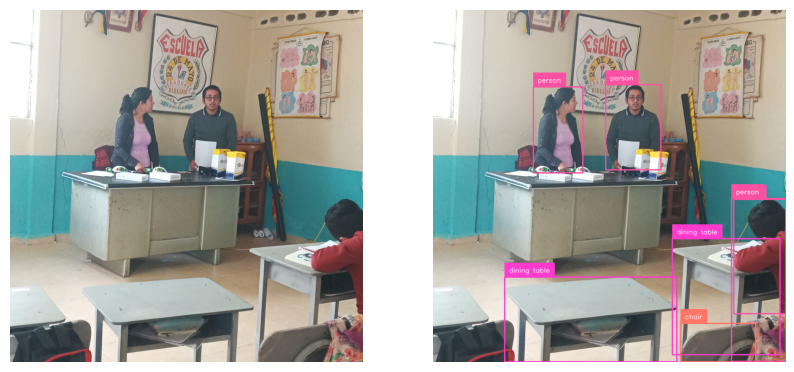

In [ ]:
resultados = modelo('https://raw.githubusercontent.com/vlarobbyk/fundamentos-vision-artificial-doctoradoCC/main/images/Catedra-UNESCO-UPS-Imagen-Aula.jpg')[0]

url = 'https://raw.githubusercontent.com/vlarobbyk/fundamentos-vision-artificial-doctoradoCC/main/images/Catedra-UNESCO-UPS-Imagen-Aula.jpg'

page = requests.get(url)
img = Image.open(BytesIO(page.content)).convert('RGB') # Cargamos la imagen

# Considerar que cuando se lee la imagen directamente desde el disco, OpenCV la representa como BGR (intercambia los canales Rojo y Azul)

image = np.array(img) # Convertimos la imagen en una representación de NumPy

detections = sv.Detections.from_ultralytics(resultados)
# Update BoundingBoxAnnotator to BoxAnnotator
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

#sv.plot_image(annotated_image)

#resultados[0].show()

image = np.array(img)
figure, axes = pp.subplots(nrows=1, ncols=2)
figure.set_size_inches(10,7)

axes[0].imshow(image)
axes[0].axis('off')

axes[1].imshow(annotated_image)
axes[1].axis('off')


pp.show()

A continuación se visualiza la información que contiene las coordenadas de las 4 detecciones que se obtiene con el modelo *small* de *YOLOv10*, así como el nivel de confidencia:
  

In [ ]:
print(resultados[0].boxes.xyxy)
print(resultados[0].boxes.conf)

tensor([[391.0861, 171.6496, 516.4839, 364.5068]], device='cuda:0')
tensor([0.8145], device='cuda:0')


Ahora pasamos a probar los resultados que se obtienen si en lugar de usar el modelo *small* se emplea la versión *medium*:


Found https://raw.githubusercontent.com/vlarobbyk/fundamentos-vision-artificial-doctoradoCC/main/images/Catedra-UNESCO-UPS-Imagen-Aula.jpg locally at Catedra-UNESCO-UPS-Imagen-Aula.jpg
image 1/1 /content/Catedra-UNESCO-UPS-Imagen-Aula.jpg: 640x640 3 persons, 2 backpacks, 1 chair, 2 dining tables, 44.4ms
Speed: 2.6ms preprocess, 44.4ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)


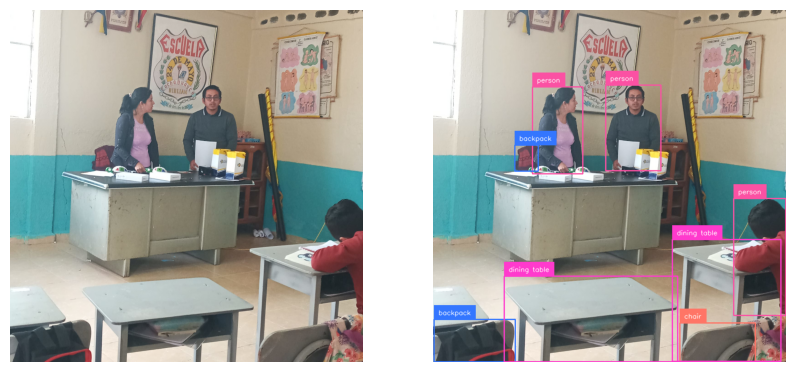

In [ ]:
modelo = YOLO('yolo12m.pt')
resultados = modelo('https://raw.githubusercontent.com/vlarobbyk/fundamentos-vision-artificial-doctoradoCC/main/images/Catedra-UNESCO-UPS-Imagen-Aula.jpg')[0]

url = 'https://raw.githubusercontent.com/vlarobbyk/fundamentos-vision-artificial-doctoradoCC/main/images/Catedra-UNESCO-UPS-Imagen-Aula.jpg'

page = requests.get(url)
img = Image.open(BytesIO(page.content)).convert('RGB') # Cargamos la imagen

# Considerar que cuando se lee la imagen directamente desde el disco, OpenCV la representa como BGR (intercambia los canales Rojo y Azul)

image = np.array(img) # Convertimos la imagen en una representación de NumPy

detections = sv.Detections.from_ultralytics(resultados)
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

#sv.plot_image(annotated_image)

#resultados[0].show()

image = np.array(img)
figure, axes = pp.subplots(nrows=1, ncols=2)
figure.set_size_inches(10,7)

axes[0].imshow(image)
axes[0].axis('off')

axes[1].imshow(annotated_image)
axes[1].axis('off')


pp.show()


Finalmente, probamos los resultados que se obtienen al usar el modelo *extra large*:


Found https://raw.githubusercontent.com/vlarobbyk/fundamentos-vision-artificial-doctoradoCC/main/images/Catedra-UNESCO-UPS-Imagen-Aula.jpg locally at Catedra-UNESCO-UPS-Imagen-Aula.jpg
image 1/1 /content/Catedra-UNESCO-UPS-Imagen-Aula.jpg: 640x640 3 persons, 2 backpacks, 1 couch, 3 dining tables, 116.6ms
Speed: 3.2ms preprocess, 116.6ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)


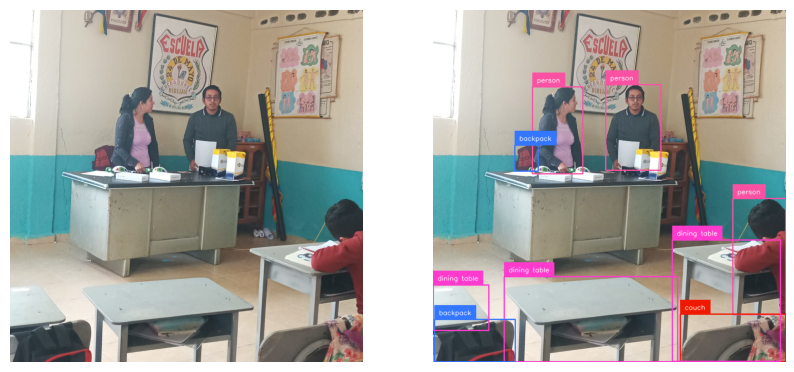

In [ ]:
modelo = YOLO('yolo12x.pt')
resultados = modelo('https://raw.githubusercontent.com/vlarobbyk/fundamentos-vision-artificial-doctoradoCC/main/images/Catedra-UNESCO-UPS-Imagen-Aula.jpg')[0]

url = 'https://raw.githubusercontent.com/vlarobbyk/fundamentos-vision-artificial-doctoradoCC/main/images/Catedra-UNESCO-UPS-Imagen-Aula.jpg'

page = requests.get(url)
img = Image.open(BytesIO(page.content)).convert('RGB') # Cargamos la imagen

# Considerar que cuando se lee la imagen directamente desde el disco, OpenCV la representa como BGR (intercambia los canales Rojo y Azul)

image = np.array(img) # Convertimos la imagen en una representación de NumPy

detections = sv.Detections.from_ultralytics(resultados)
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

#sv.plot_image(annotated_image)

#resultados[0].show()

image = np.array(img)
figure, axes = pp.subplots(nrows=1, ncols=2)
figure.set_size_inches(10,7)

axes[0].imshow(image)
axes[0].axis('off')

axes[1].imshow(annotated_image)
axes[1].axis('off')


pp.show()

### <font color='orange'> Exportación del modelo YOLOv12 al formato ONNX </font>
A fin de poder usar el modelo en **OpenCV C++**, es necesario exportar el modelo al formato ONNX, que se puede leer y cargar en dicho lenguaje.

Para ello, debemos ejecutar el siguiente comando:

In [ ]:
modelo.export(format = 'onnx', opset = 12, simplify = True, optimize = True, half = True, device = 'cpu')

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
WARNING ⚠️ half=True only compatible with GPU export, i.e. use device=0, setting half=False.

PyTorch: starting from 'yolo12n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.3 MB)

ONNX: starting export with onnx 1.19.1 opset 12...
ONNX: slimming with onnxslim 0.1.77...
ONNX: export success ✅ 2.0s, saved as 'yolo12n.onnx' (10.2 MB)

Export complete (2.3s)
Results saved to /content
Predict:         yolo predict task=detect model=yolo12n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolo12n.onnx imgsz=640 data=None  
Visualize:       https://netron.app


'yolo12n.onnx'

# Bibliografía
[1] Statista. (2024, March 28) *Computer vision - worldwide: Statista market forecast.* Computer Vision - Worldwide . https://www.statista.com/outlook/tmo/artificial-intelligence/computer-vision/worldwide

[2] Wang, A., Chen, H., Liu, L., Chen, K., Lin, Z., Han, J., & Ding, G. (2024). *Yolov10: Real-time end-to-end object detection.* arXiv preprint arXiv:2405.14458.
